In [1]:

import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plotMap(dataDir, segmentNum):
    for index in range(segmentNum):
        filename = '{}segment_{}.csv'.format(dataDir, index)
        tra = np.loadtxt(filename, delimiter=",", dtype="double")
        xpoint = tra[:,0]
        ypoint = tra[:,1]
        cos = tra[:, 2]
        sin = tra[:, 3]
        lLength = tra[:, 5]
        rLength = tra[:, 7]
        # left boundary
        l_b_x = xpoint - lLength*sin
        l_b_y = ypoint + lLength*cos
        # right boundary
        r_b_x = xpoint + rLength*sin
        r_b_y = ypoint - rLength*cos

        plt.plot(xpoint, ypoint, color='r')
        plt.plot(l_b_x, l_b_y, color='b')
        plt.plot(r_b_x, r_b_y, color='b')
    plt.show()

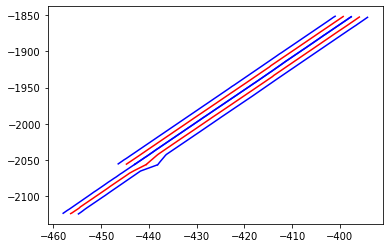

In [5]:
dataDir = "./data/bag_play/"
segmentNum = 3
plotMap(dataDir, segmentNum)

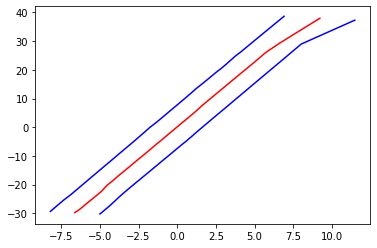

In [10]:
filename = './data/bag_play/segment_2.csv'
tra = np.loadtxt(filename, delimiter=",", dtype="double")
xpoint = tra[:,0] - np.average(tra[:,0])
ypoint = tra[:,1] - np.average(tra[:,1])
cos = tra[:, 2]
sin = tra[:, 3]
lLength = tra[:, 5]
rLength = tra[:, 7]
# left
l_b_x = xpoint - lLength*sin
l_b_y = ypoint + lLength*cos
# right
r_b_x = xpoint + rLength*sin
r_b_y = ypoint - rLength*cos

plt.plot(xpoint, ypoint, color='r')
plt.plot(l_b_x, l_b_y, color='b')
plt.plot(r_b_x, r_b_y, color='b')
plt.show()